# (1.) LeNet-5 จำแนกลายมือเขียน

Workshop นี้แสดงการสร้าง Model จากสถาปัตยกรรม LeNet-5 จำแนกลายมือเขียนของ MNIST

LeNet-5 ใช้ input ขนาด 32x32 แต่ข้อมูลลายมือเขียนของ MNIST มีขนาด 28x28 ดังนั้น เพื่อให้มิติอินพุต Image ตรงกับสถาปัตยกรรม LeNet-5 จะใช้วิธีเติมด้วย 0 (Padding) ข้างละ 2 Pixel เพื่อให้ได้มิติ 32x32

ใช้ workshop ของบทที่ผ่านมา โดยส่วนข้อมูล ต่อด้วยโค้ดด้วย 0 จากนั้นลองตรวจสอบมิติ จะพบว่ามีขนาด 32x32 1 Channel (1 สี) ถ้าอินพุตมีมิติ 32x32 อยู่แล้ว ก็ข้ามส่วนการเติม 0 นี้ไป

In [ ]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()    # Load Dataset

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)    # Feature
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# ใช้ np.expand_dims เพื่อเพิ่มมิติข้างหลัง(-1) W x H
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# ทำการ Padding 0
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')    # เติมด้วย 0 (Padding)
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

in_shape = X_train.shape[1:]
in_shape    # ขนาด 32x32 x 1 สี

(32, 32, 1)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

10

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten

model = Sequential()    # สร้าง Model

# Conv2D (filters=6, kernel_size=(5,5)) + Pooling # 1
model.add(Conv2D(6, (5,5), activation='relu', input_shape=in_shape)) # C1
model.add(AveragePooling2D((2,2)))    #S2

# Conv2D (filters=16, kernel_size=(5,5)) + Pooling # 2
model.add(Conv2D(16, (5,5), activation='relu')) # C3
model.add(AveragePooling2D((2,2)))    #S4

model.add(Conv2D(120, (5,5), activation='relu')) # C5

model.add(Flatten())
model.add(Dense(84, activation='relu'))   # F6

model.add(Dense(num_classes, activation='softmax'))   # Output
model.summary()   # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

จะเห็นว่าโครงสร้าง Convo2D+Aveage2D Pooling 2 ชั้น แล้วต่อด้วย  Neural Network อีก 3 ชั้น

ทำการคอมไพล์ fit (ใช้ GPU ดีกว่า) และ ทดสอบ (Evaluate)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

import time   # สำหรับจับเวลา
start = time.time()     # เวลาเริ่ม

history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1,
                     validation_data=(X_test, y_test))    # Train

end = time.time()   # เวลาที่เสร็จแล้ว
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/20
469/469 [==============================] - 7s 6ms/step - loss: 0.2372 - accuracy: 0.9323 - val_loss: 0.0782 - val_accuracy: 0.9751
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0498 - val_accuracy: 0.9832
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0446 - accuracy: 0.9862 - val_loss: 0.0411 - val_accuracy: 0.9864
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0497 - val_accuracy: 0.9849
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0514 - val_accuracy: 0.9840
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0338 - val_accuracy: 0.9886
Epoch 

ประเมินผล Model

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9885
Accuracy: 0.988


พล็อตดูกราฟค่า Loss

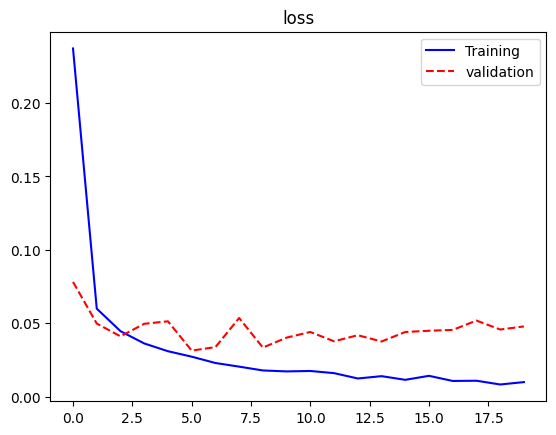

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('loss')
plt.legend()
plt.show()

ดูทรงน่าจะ **Overfitting**

**Note**: LeNet ใช้ Activation function TanH แต่ใน Workshop นี้ใช้ ReLU เนื่องจากข้อมูลภาพอยู่ในช่วง 0-1 แนวโน้มได้ Model ที่มีความแม่นยำสูงกว่า

# (2.) CNN จำแนก Dog Cat

Workshop นี้จำแนกภาพว่าเป็นภาพ แมวหรือสุนัข

โหลด dataset จาก https://www.kaggle.com/competitions/dogs-vs-cats/data แล้วแตกไฟล์ zip จัดโฟลเดอร์ให้มี train_set, val_set, test_set โดยให้โฟลเดอร์ train กับ val มีโฟลเดอร์ย่อยข้างในอีก คือ cat กับ dog ส่วนโฟลเดอร์ test ให้รวมทั้ง cat, dog เลย ไม่ต้องแยกโฟลเดอร์

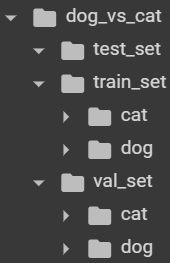

## อ่านข้อมูล

ภาพที่เอาเข้ามามีจำนวนท่ก การโหลดอ่านข้อมูลเข้าไป Train พร้อมกันทีเดียวอาจทำเกิดปัญหาหน่วยความจำไม่พอ ซึ่ง Tensorflow Keras มี flow_from_directory (อยู่ใน DataGenerator)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

กำหนด path โฟลเดอร์ที่เก็บภาพ และขนาดของภาพอินพุต ใช้ 64x64 (ถ้าเครื่องแรงก็เอาขนาดมากกว่านี้)

In [2]:
train_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/train_set'   # สำหรับ Train
val_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/val_set'   # สำหรับ Validation
test_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set'   # สำหรับ Test

target_img_shape=(64,64)    # ขนาดภาพอินพุตเข้าสู่ Model (W x H)

ตั้งค่า Instance สำหรับการ Train (train_datagen) และ Validation (val_datagen) ใช้ ImageDataGenerator และกำหนดให้ทำ Normalize พิกเซล จากนั้นใช้ .flow_from_directory สั่งอ่านไฟล์ในโฟลเดอร์ (ก็คือไฟล์ภาพ cat dog ภายใต้ Train และ Val)

สั่งอ่านข้อมูลภาพ กำหนดพารามิเตอร์ดังนี้
- target_size: ขนาดของภาพ ข้อนี้คือ 64x64 โดย Normalize แล้ว resize ให้เป้นขนาดที่กำหนดอัตโนมัติ (ที่จะป้อนเข้า CNN)
- class_mode: โหมดของ Classification ได้แก่ "categorical", "binary", "sparse" (default: "categorical") ถ้าจะกำหนดเป็น categorical ต้องใช้ label 2D one-hot encode ส่วนถ้าต้องการกำหนด spare จะใช้ 1D integer label
- batch_size: แบ่งอ่านภาพเป็น Batch ป้องกันปัญหา RAM ไม่พอ

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)    # Normalize Pixel
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=target_img_shape,
                                              batch_size=32,
                                              class_mode='binary')

Found 600 images belonging to 2 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)    # Normalize Pixel
val_set = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_img_shape,
                                              batch_size=32,
                                              class_mode='binary')

Found 120 images belonging to 2 classes.


- train มี 600 (100%) ภาพ 2 คลาส

- val มี 120 (20%) ภาพ 2 คลาส

## Visualization

สรุปข้อมูล ว่าแต่ละคลาสมีจำนวนข้อมูล (จำนวนภาพ) เท่าใด

In [5]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)    # คลาส id 0 และ 1
print(counts)     # จำนวนข้อมูลของคลาส 0 และ 1 ตามลำดับ

Training
[0 1]
[300 300]


In [6]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)
print(counts)

Validation
[0 1]
[60 60]


คำนวณสัดส่วน จะได้ว่า Validation มีประมาณเกือบ 20%

In [7]:
_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:',
      val_count/(train_count+val_count) * 100)

Ratio Validation/Training set: [16.66666667 16.66666667]


ตรวขสอบขนาดมิติภาพ ซึ่งทั้ง train_set และ validation_set จะมีขนาดเท่ากัน เนื่องจากตั้งค่าด้วยพารามิเตอร์เหมือนกัน

In [8]:
train_set[0][0][0].shape

(64, 64, 3)

ดูตัวอย่างคลาส และ visualize ภาพ

{'cat': 0, 'dog': 1}
(32, 64, 64, 3)
(32,)
class: 1.0


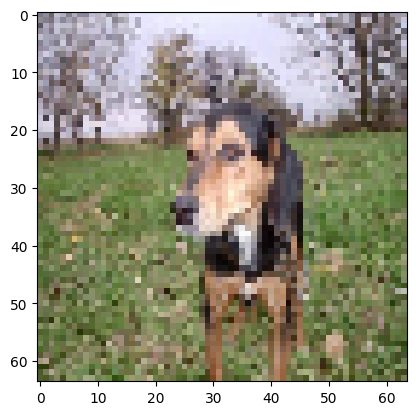

In [21]:
print(train_set.class_indices)  # อ่านภาพแล้วเข้ารหัสเป็นตัวเลขคลาส cat=0, dog=1

for image_batch, label_batch in train_set:
  print(image_batch.shape)  # ขนาด batch_size 32 ภาพ และภาพมีมิติ 64x64x3 channel
  print(label_batch.shape)    # จำนวน label ใน batch (จะเท่ากับ batch_size)
  plt.imshow(image_batch[0])
  print('class:', label_batch[0])     # ภาพอยู่ในคลาสใด
  break   # (รันแต่ละครั้งอาจไม่เหมือนเดิม เพราะเป้นการสุ่ม)
plt.show()

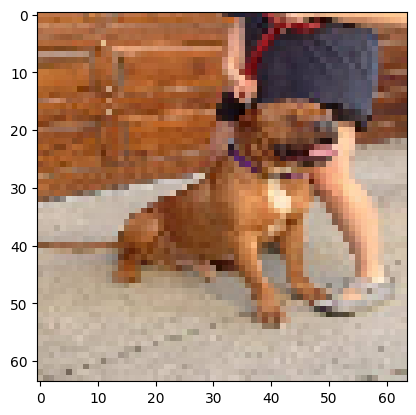

In [22]:
plt.imshow(train_set[0][0][0])
plt.show()

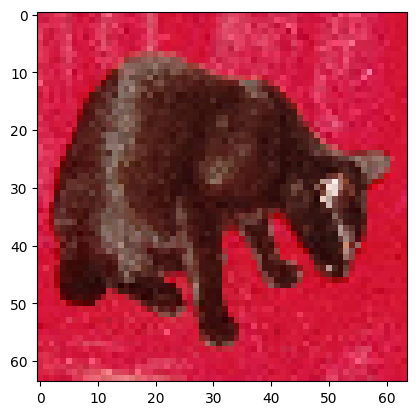

In [23]:
plt.imshow(val_set[0][0][0])
plt.show()

## สร้าง Model

สร้าง CNN โดย Convolution ชั้นแรก กำหนดขนาดมิติที่จะใช้เป็นอินพุต Model (input_shape) ต้องเท่ากับที่กำหนด resize ไว้ (ตอนอ่านไฟล์ด้วย .flow_from)

In [9]:
in_shape=(target_img_shape[0], target_img_shape[1], 3)
in_shape    # มิติ 64x64x3

(64, 64, 3)

สร้าง Model เลย

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dropout

model = Sequential()
# Conv2D (filters=32, kernel_size=(3,3)) + Pooling # 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) # C1
model.add(MaxPool2D((2,2)))    #S2

# Conv2D (filters=64, kernel_size=(3,3)) + Pooling # 2
model.add(Conv2D(64, (3,3), activation='relu')) # C3
model.add(MaxPool2D((2,2)))    #S4

# Conv2D (filters=128, kernel_size=(3,3)) + Pooling # 3
model.add(Conv2D(128, (3,3), activation='relu')) # C5
model.add(MaxPool2D((2,2)))    #S6

model.add(Flatten())
model.add(Dense(128, activation='relu'))   # F7

model.add(Dense(1, activation='sigmoid'))   # Output
model.summary()   # ดูสรุปโครงสร้าง Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

## Compile และ Train

ทำการ Compile และ Train ใช้เวลาประมาณ 2 นาที

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import time
start = time.time()
history = model.fit(train_set,
                    steps_per_epoch=len(train_set),
                    validation_data=val_set,
                    epochs=20, verbose=1)
end = time.time()
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/20
19/19 [==============================] - 99s 5s/step - loss: 0.7007 - accuracy: 0.5033 - val_loss: 0.6911 - val_accuracy: 0.6083
Epoch 2/20
19/19 [==============================] - 2s 98ms/step - loss: 0.6853 - accuracy: 0.5733 - val_loss: 0.6932 - val_accuracy: 0.4833
Epoch 3/20
19/19 [==============================] - 2s 97ms/step - loss: 0.6619 - accuracy: 0.5950 - val_loss: 0.6643 - val_accuracy: 0.6250
Epoch 4/20
19/19 [==============================] - 2s 97ms/step - loss: 0.6380 - accuracy: 0.6333 - val_loss: 0.6674 - val_accuracy: 0.6083
Epoch 5/20
19/19 [==============================] - 2s 104ms/step - loss: 0.6154 - accuracy: 0.6933 - val_loss: 0.6058 - val_accuracy: 0.6750
Epoch 6/20
19/19 [==============================] - 3s 133ms/step - loss: 0.5631 - accuracy: 0.7250 - val_loss: 0.6060 - val_accuracy: 0.6083
Epoch 7/20
19/19 [==============================] - 2s 114ms/step - loss: 0.5264 - accuracy: 0.7283 - val_loss: 0.5716 - val_accuracy: 0.7083
Epoch 8/20


  ## ประเมิน

พล็อต Loss Accuracy สังเกตเห็นว่า Loss ควรลดลงตามจำนวนรอบ Epoch แต่ในที่นี้ เส้นกราฟสูงขึ้น ปัญหาอาจเกิดจากข้อมูลในการ Train ยังน้อยไป

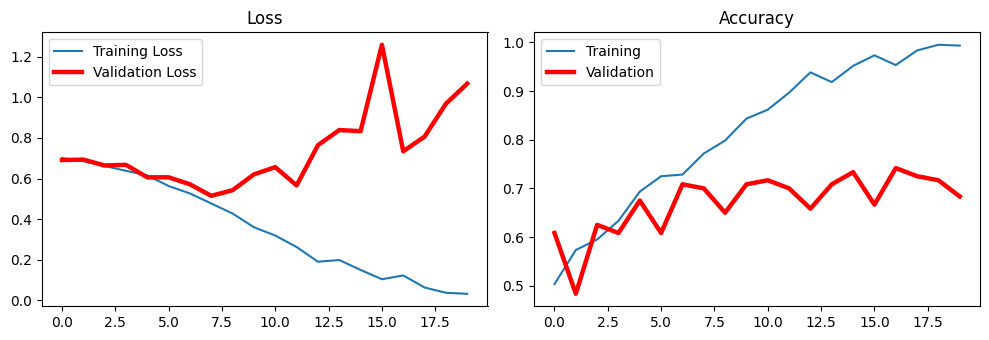

In [13]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()

plt.tight_layout()
plt.show()

ประเมิน Model ได้ Score ประมาณ 68.3% ซึ่งยังถือว่าไม่ค่อยดีนัก ต้องเพิ่มจำนวนภาพในการ Train และเพิ่มจำนวน Epoch (สามารถ Train ต่อโดยรัน .fit ได้เลย ไม่ต้อง Compile)

In [14]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}'.format(acc[1]))

score = 0.683


## ทดสอบและใช้งาน Model Predict ภาพ

ทดลองให้ Model Predict ภาพ โดยเตรียมภาพแมว สุนัข จากนั้นส่งเข้า Predict ซึ่งลำดับการประมวลผล จะต้องทำการ Normalize ภาพเสียก่อน แล้วจึงส่งเข้า Model Predict

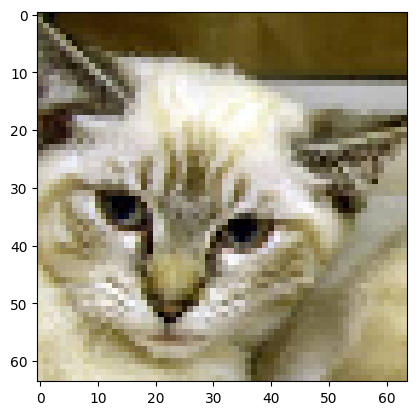

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64)   # กำหนดมิติภาพอินพุต ต้องเท่ากับตอนสร้าง Model
test_image = image.load_img('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/1001.jpg',
                            target_size=target_img_shape)     # อ่านภาพ

test_image = image.img_to_array(test_image)   # เปลี่ยนเป็น Array
test_image /= 255.0     # Normalize

plt.imshow(test_image)      # แสดงภาพ
plt.show()

ขณะนี้ test_image จะมีโครงสร้างเป็น 3D Tensor (Array 3D) คือ 64, 64, 3 ต้องปรับใหม่เป็น 4 มิติ เพื่อส่งเข้า Model ดังนี้

In [16]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape  # 1 record, ขนาด 64x64, 3 Channel (RGB)

(1, 64, 64, 3)

ส่งเข้า Model ทำการ Predict จะได้ค่าความน่าจะเป็นระหว่าง 0 ถึง 1

In [17]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 381ms/step


array([[0.9999932]], dtype=float32)

ตรวจสอบค่า Label ของคลาส พบว่า 0 คือแมว 1 คือสุนัข

In [18]:
train_set.class_indices

{'cat': 0, 'dog': 1}

นำไปเปรียบเทียบโดยตัด Threshold ที่ 0.5 ถ้าค่ามากกว่า Threshold เท่ากับภาพที่นำมา Predict มีคลาสเป็น 1 คือ สุนัข

In [19]:
predict = ''
if result[0][0] > 0.5:
  predict = 'Dog'
else:
  predict = 'Cat'

# cls = 'Dog' if result[0][0] > 0.5 else 'Cat'   # เขียนแบบสั้นก็ได้
print(predict)

Dog


หากต้องการนำภาพในโฟลเดอร์ test_set มาทดสอบ เนื่องจากมีหลายภาพ ให้สร้างฟังก์ชันอ่านภาพแล้ว Predict ดังนี้

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_dog_cat(lst):
  y_pred = []; y_pred_cls = []; img_lst = []
  for i in lst:
    img = load_img(i, target_size=target_img_shape)
    img = img_to_array(img)
    img /= 255.0
    img_lst.append(img)

    img = np.expand_dims(img, axis=0)
    y_pred_i = model.predict(img)
    y_pred_cls_i = 'Dog' if y_pred_i > 0.5 else 'Cat'   # Threshold 0.5
    y_pred.append(y_pred_i)
    y_pred_cls.append(y_pred_cls_i)

  return img_lst, y_pred_cls, y_pred

ต้องนำภาพ สุนัขและแมวจาก test_set แล้วสั่งสแกนโฟลเดอร์อ่านไฟล์ไป Predict

In [28]:
import glob
import os
mylist = [f for f in glob.glob(test_dir+'/*')]
img_lst, y_pred_cls, y_pred = predict_dog_cat(mylist)

for i in mylist:
  print(os.path.basename(i), end="|")

1/1 [==============================] - 0s 18ms/step
10001.jpg|10002.jpg|10010.jpg|100.jpg|10.jpg|10004.jpg|10003.jpg|10006.jpg|1.jpg|10007.jpg|10009.jpg|1001.jpg|10005.jpg|10008.jpg|10000.jpg|1000.jpg|999.jpg|9989.jpg|9988.jpg|9986.jpg|9985.jpg|9987.jpg|

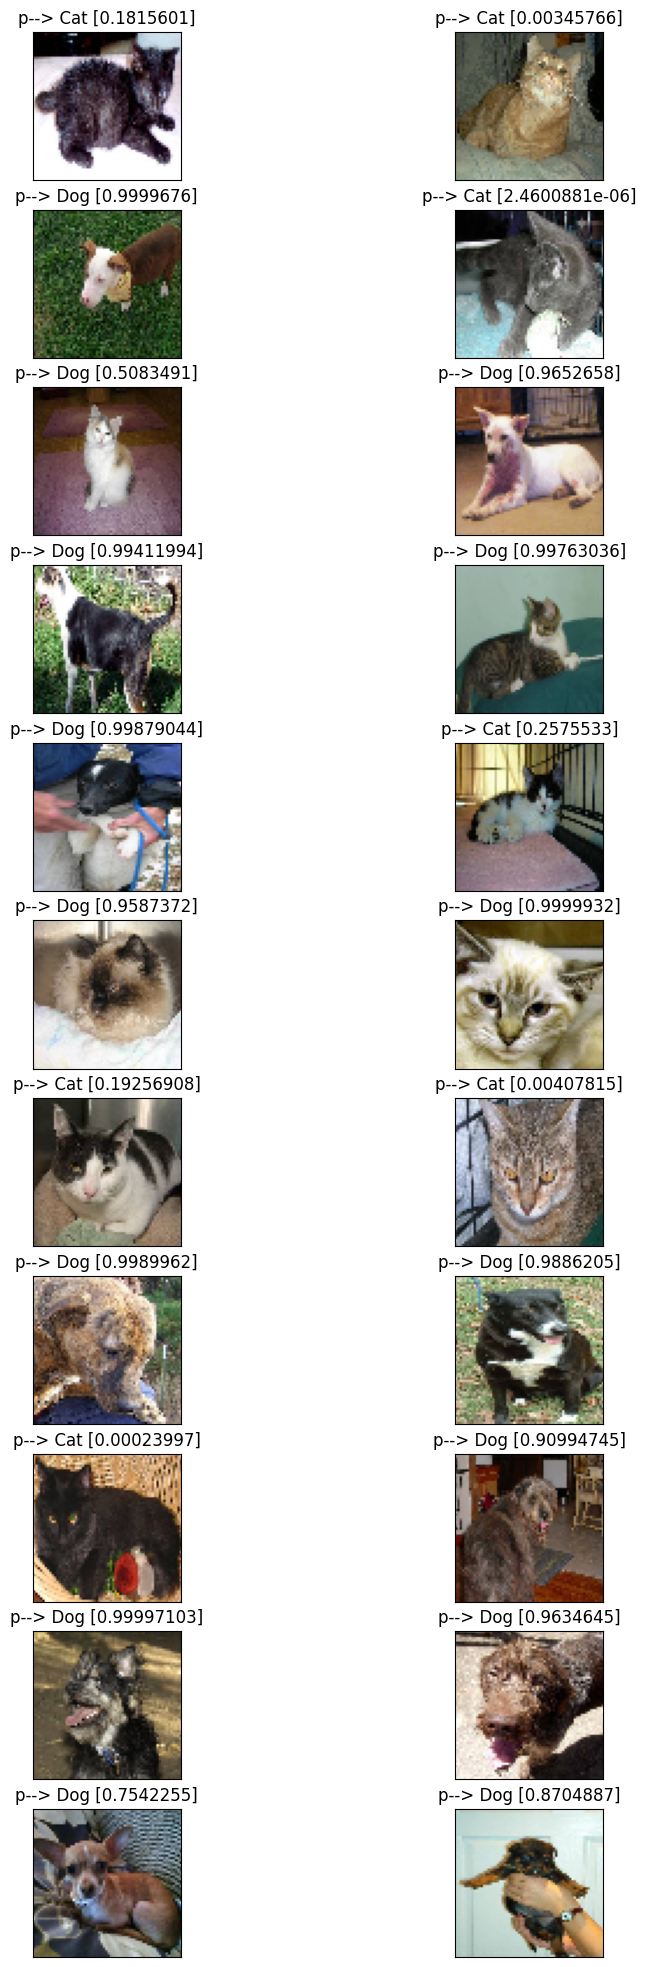

In [37]:
fig = plt.figure(figsize=(10, 25))
for i, k in enumerate(img_lst):   # วน loop อ่านค่า list แล้วพล็อต
  plt.subplot(11, 2, i+1)
  plt.imshow(k)
  plt.title('p--> {} {}'.format(y_pred_cls[i], y_pred[i][0]))
  plt.xticks([])
  plt.yticks([])
plt.show()

จากรูป ผลการทดสอบ P--> คือ predict ว่าเป็นอะไร ส่วนค่าใน [] คือความน่าจะเป็นที่ได้จากการ Predict มีค่าระหว่าง 0 ถึง 1 ผลการทำนายอาจไม่แม่นยำ เพราะใส่ภาพเข้าไปน้อย

# (3.) Data Augmentation

ทำ Workshop 2 ซ้ำ แต่เพิ่มเทคนิค Data augmentation โค้ดโดยรวมเหมือนเดิม

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/train_set'   # สำหรับ Train
val_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/val_set'   # สำหรับ Validation
test_dir = '/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set'   # สำหรับ Test

target_img_shape=(64,64)    # ขนาดภาพอินพุตเข้าสู่ Model (W x H)

## เตรียมข้อมูล + Data Augmentation

In [3]:
# train_datagen = ImageDataGenerator(rescale=1./255)    # เดิม
train_datagen = ImageDataGenerator(rescale=1./255,     # ใหม่
                                   rotation_range=20,     # มุมหมุน +-20
                                   height_shift_range=0.15,     # ระยะเลื่อนแนวดิ่ง +-0.15
                                   width_shift_range=0.15,     # ระยะเลื่อนแนวนอน
                                   shear_range=0.9,     # การเฉือน
                                   zoom_range=0.2,     # ค่าซูม
                                   horizontal_flip=True,     # พลิกแนวนอน
                                   fill_mode='nearest')     # โหมดเติมพิกเซลภาพ


train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=target_img_shape,
                                              batch_size=32,
                                              class_mode='binary')    # เหมือนเดิม

Found 600 images belonging to 2 classes.


In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)        # เหมือนเดิม
val_set = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_img_shape,
                                              batch_size=32,
                                              class_mode='binary')

Found 120 images belonging to 2 classes.


Visualize ดูภาพ

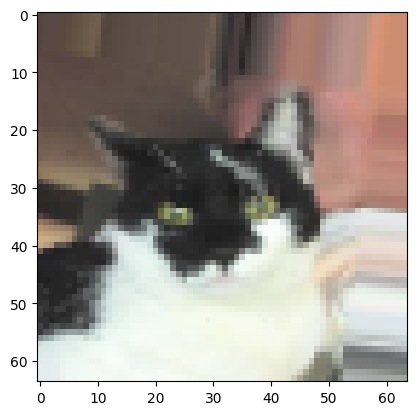

In [4]:
plt.imshow(train_set[0][0][0])
plt.show()

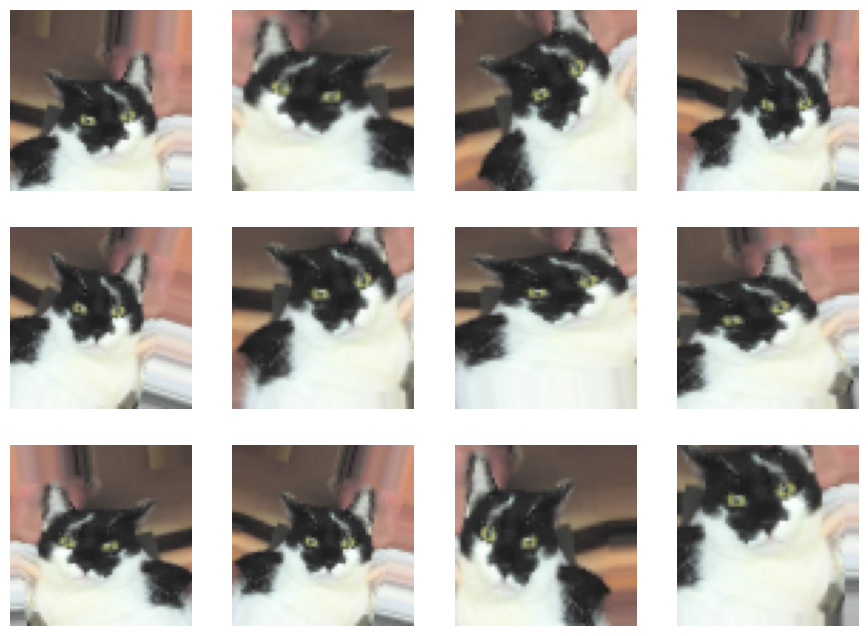

In [6]:
# ดูหลายภาพ
nplots = 12    # จำนวนที่ต้องการพล็อต

def visual_multi(images_arr):
  fig = plt.figure(figsize=(11, 8))   # ขนาดพล็อต
  for j in range(nplots):
    plt.subplot(3,4,j+1)
    plt.imshow(images_arr[j])
    plt.axis('off')
  plt.show()

augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

จะได้ภาพที่แปลงด้วย Data augmentation จำนวนภาพเกิดขึ้นตามการวนรอบ ถ้าจำนวนรอบเท่าใด ก็จะ Generate เท่านั้น ในข้อนี้สั่ง 12 รอบ ภาพที่ได้จะแตกต่างกันไป เช่น หมุนเอียงเป็นมุม ซูมย่อขยาย บีบ พลิกซ้ายขวา ด้วยค่าสุ่ม ฯลฯ

(ทำ Data Augmentation กับ Training set เท่านั้น Validation/Test set ไม่ต้องทำ เนื่องจากเราต้องการประเมินกับข้อมูลจริงๆ (Real-world data))

## Train และ Test

ทำเหมือนกับ workshop 2

In [7]:
in_shape=(target_img_shape[0], target_img_shape[1], 3)
in_shape    # มิติ 64x64x3

(64, 64, 3)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
import time
start = time.time()
history = model.fit(train_set,
                    steps_per_epoch=len(train_set),
                    validation_data=val_set,
                    epochs=20, verbose=1)
end = time.time()
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/20
19/19 [==============================] - 107s 5s/step - loss: 0.7012 - accuracy: 0.5033 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 3s 164ms/step - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 5s 249ms/step - loss: 0.6906 - accuracy: 0.5000 - val_loss: 0.6841 - val_accuracy: 0.5417
Epoch 4/20
19/19 [==============================] - 5s 254ms/step - loss: 0.6828 - accuracy: 0.6050 - val_loss: 0.6596 - val_accuracy: 0.6167
Epoch 5/20
19/19 [==============================] - 4s 223ms/step - loss: 0.6644 - accuracy: 0.6183 - val_loss: 0.7571 - val_accuracy: 0.5167
Epoch 6/20
19/19 [==============================] - 2s 131ms/step - loss: 0.6719 - accuracy: 0.6083 - val_loss: 0.7362 - val_accuracy: 0.5500
Epoch 7/20
19/19 [==============================] - 6s 310ms/step - loss: 0.6467 - accuracy: 0.6250 - val_loss: 0.6694 - val_accuracy: 0.6083
Epoch 8

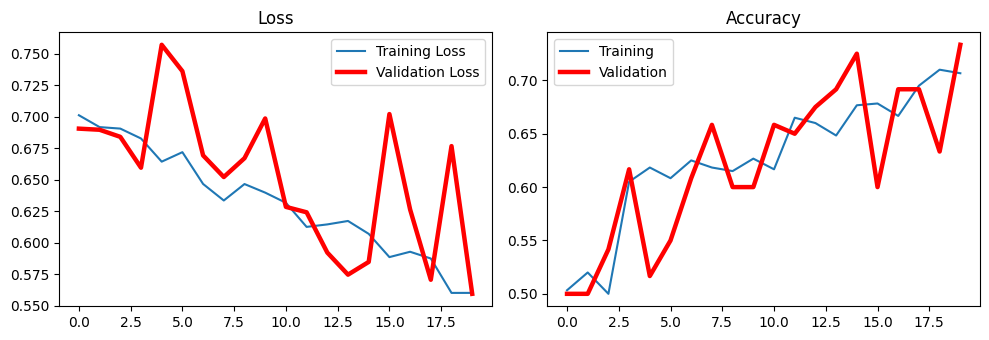

In [13]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()

plt.tight_layout()
plt.show()

ผลการพล็อต Loss และ Accuracy เมื่อเทียบกับ Workshop 2 ที่ไม่ได้ใช้ Data Augmentation จะเห็นว่า เส้น Loss ไม่โด่งมาก และ Accuracy ของ Training กับ Validation ก็ไม่ต่างกันมาก

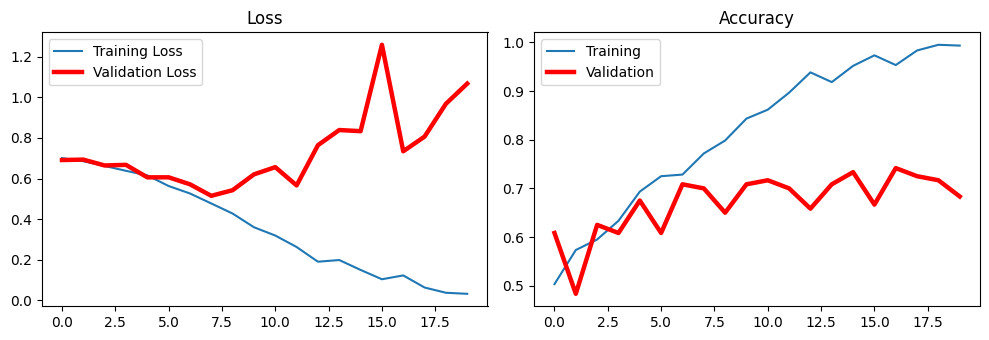

In [14]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}'.format(acc[1]))

score = 0.733


# (4.) ใช้ VGG จำแนกภาพ

ข้อนี้แสดงการสร้าง Image Classification จำแนกรูปภาพ 1000 คลาส เช่น รถ เรือ สายพันธุ์แมว สายพันธุ์สุนัข ... รวม 1000 คลาส โดยไม่ต้องเตรียม Dataset ไม่ต้องทำการ Train แล้ว

วิธีการคือใช้ Pre-trained Model ข้อนี้ใช้ VGG16 ซึ่ง Keras มีไว้ให้อยู่แล้ว ขั้นตอนคือ สร้าง Model แล้วโหลด weight มาใช้

Insance (model) ที่ได้จาก VGG16() คือ Model ที่ Keras สร้างให้ตามโครงสร้างสถาปัตยกรรมของ VGG16 ซึ่งถ้าเราจะสร้างเองก็ได้เหมือนกัน โดยต้อง add ชั้น Layer ต่างๆเข้าไปจนครบ ซึ่งถ้าเราสร้างเองคงไม่ง่าย เพราะมีจำนวนหลาย Layer มาก

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = VGG16(weights='imagenet')   # โหลด weights imagenet
# model = VGG16()       # หรือไม่ต้องกำหดก็ได้ (เนื่องจากเป็น Default)

model.summary()   # แสดงสรุป Model

553467096/553467096 [==============================] - 20s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

ไฟล์ Pre-trained ที่โหลดมาเป็นไฟล์ weights (.h5) จะถูกเก็บไว้ที่ ~/.keras/models/ ขนาดไฟล์ (Size) 528 MB

.summary() จะแสดงสรุปสถาปัตยกรรม แต่ละชั้นจะแสดงขนาดมิติของข้อมูล เช่น InputLayer 224 x 224 x 3 หลังจาก Conv block1 แล้วจะได้เป็น 224 x 224 x 64 (Feature map ขนาด 64) จากนั้น MaxPooling2D แล้วได้ข้อมูลขนาด 224 x 224 x 128 แล้วเข้า Convolution และ Pooling ลำดับต่อๆไป จนชั้นสุดท้ายจะเป็น 1000 คลาส

จาก model=VGG16() เป็นการสร้าง Model และโหลด weight ใส่ให้เรียบร้อย เท่ากับว่า สามารถเรียกใช้ predict ได้เลย ไม่ต้อง Train แล้ว โดยการใช้งานจะต้องอินพุตให้ตรงกับขนาดสเปคของโมเดล คือ 224 x 224 x 3 สี (3 Channel RGB)

ทดลองใช้งาน Predict โดยเตรียมภาพสุนัขหรือแมวสำหรับการ Predict

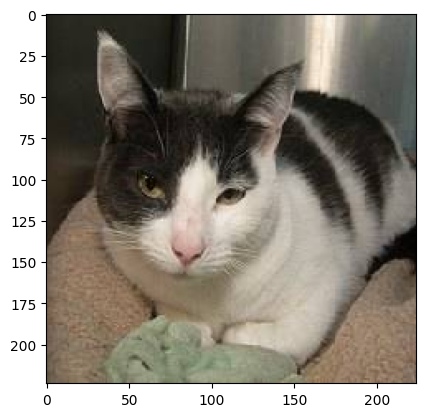

In [26]:
# โหลดเปิดไฟล์ภาพด้วย load_img (ใช้ไม่ได้กับ link ภาพข้างนอก)
img = load_img('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/10005.jpg', target_size=(224, 224))
plt.imshow(img)

min max (before) = 0.0 255.0
min max (after) = -123.68 137.061


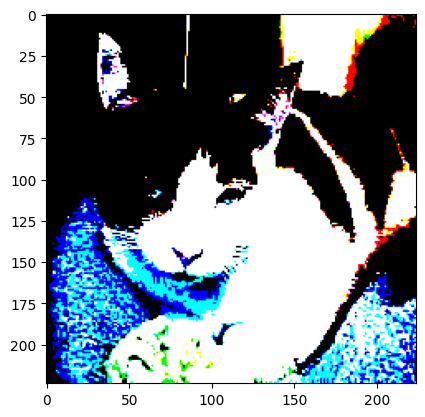

In [27]:
img = img_to_array(img)
print('min max (before) =', img.min(), img.max())

# reshape ให้เป็นข้อมูล 1 row (1 sample) ให้เป็น (1, 224, 224, 3)
img = np.expand_dims(img, axis=0)     # img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# ปรับสเกลข้อมูลพิกเซล สำหรับ VGG model
img = preprocess_input(img)
print('min max (after) =', img.min(), img.max())
plt.imshow(img[0])

เนื่องจาก VGG ไม่ได้ใช้รูปแบบข้อมูลค่าพิกเซลภาพช่วง 0 ถึง 1 แต่ใช้วิธีปรับค่าเฉลี่ย ซึ่ง Keras มีฟังก์ชันรองรับอยู่แล้ว คือ preprocess_input() โดยหลังปรับ จะได้ค่า min ติดลบ

เมื่อพล็อตด้วย .imshow() จะแสดงภาพเป็นแบบลางๆ ไม่ชัด ต้องการจะสื่อให้เห็นว่า process แล้วได้ค่าอะไรและพอมองออกว่ารูปอะไรที่กำลังส่งเข้า Predict

In [28]:
img.shape   # ตรวจสอบมิติที่ส่งเข้า Model Predict

(1, 224, 224, 3)

ทำการ Predict ภาพที่ผ่านการ process input image แล้ว ผลลัพธ์ที่ได้จะเป็นค่าความน่าจะเป็นทั้งหมด 1000 คลาส (มิติ 1, 1000) จะต้องทำการถอดรหัส (Encode) เพื่อระบุว่าเป็นคลาส Label อะไร

In [29]:
pred = model.predict(img)   # predicts

# ถอดรหัสว่าเป็น Label อะไร กรณีนี้เลือกสูงสุด 3 ลำดับ
pred_decode = decode_predictions(pred, top=3)[0]
pred_decode

1/1 [==============================] - 1s 597ms/step


[('n02124075', 'Egyptian_cat', 0.28807396),
 ('n02123045', 'tabby', 0.10997082),
 ('n15075141', 'toilet_tissue', 0.073218994)]

จะได้ชื่อ Label ของคลาส และค่าความน่าจะเป็นสูงสุดตามจำนวนลำดับที่กำหนด ซึ่งคลาสที่ได้ ไม่เพียงบอกว่าเป็นสัตว์อะไรเท่านั้น แต่บอกถึงสายพันธุ์ด้วย

จากตัวอย่างเป็นลำดับขั้นแสดงให้เห็นขั้นตอนรวมๆต่อไป สร้างเป็นฟังก์ชันช่วย Predict

In [30]:
def predict(img_fname):
  img = load_img(img_fname, target_size=(224, 224))
  plt.imshow(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)   # ปรับสเกลข้อมูลพิกเซล สำหรับ VGG model

  pred = model.predict(img)   # predicts
  # ถอดรหัสเพื่อแสดง Label เลือกสูงสุด 3 ลำดับ
  pred_decode = decode_predictions(pred, top=3)[0]

  # แสดงผลการ Predict และค่าความน่าจะเป็นสูงสุด
  print('Predicted: {} {:.2f}%'.format(pred_decode[0][1], pred_decode[0][2] * 100))
  for i in pred_decode:
    print('{:17} {:6.3f}'.format(i[1],i[2]))

1/1 [==============================] - 1s 1s/step
Predicted: Egyptian_cat 46.21%
Egyptian_cat       0.462
tabby              0.256
tiger_cat          0.131


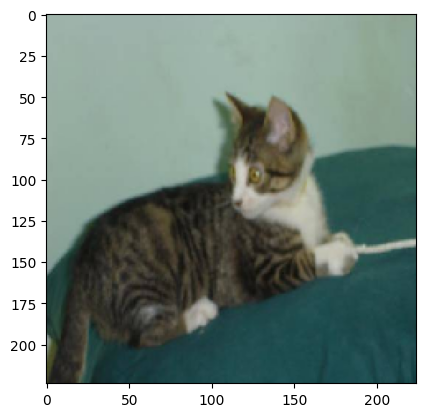

In [32]:
predict('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/10006.jpg')

1/1 [==============================] - 2s 2s/step
Predicted: Ibizan_hound 57.33%
Ibizan_hound       0.573
American_Staffordshire_terrier  0.360
Staffordshire_bullterrier  0.012


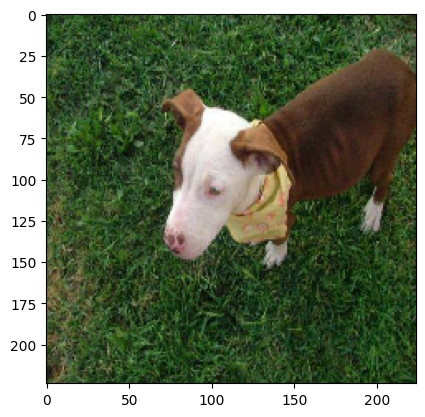

In [33]:
predict('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/10010.jpg')

รูปหมาอันนี้ทำนายถูกสายพันธุ์จริงๆ

# (5.) การใช้ ResNet จำแนกภาพ

สร้าง Image Classification เหมือน workshop 4 แต่เปลี่ยนมาใช้ Pre-trained Model ResNet50

โหลดไลบารีสำหรับ ResNet50 (Model และ process_input) และโหลดไฟล์ weight (.h5) ซึ่งมีขนาดไฟล์ 98 MB (ขนาดเล็กกว่า VGG16)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = ResNet50(weights='imagenet')   # โหลด weights imagenet
# model = ResNet50()       # หรือไม่ต้องกำหดก็ได้ (เนื่องจากเป็น Default)

102967424/102967424 [==============================] - 4s 0us/step


รายละเอียดโครงสร้าง ค่อนข้างยาวมาก โดย 1 Conv มีหลายชั้น ดังนี้

In [35]:
model.summary()   # แสดงสรุป Model

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

สรุป Model ตัว ResNet50 มีพารามิเตอร์ 25 ล้าน ในขณะที่ VGG16 มีพารามิเตอร์ 138 ล้าน ดังนั้น ResNet50 เล็กกว่า VGG16

In [36]:
def predict(img_fname):
  img = load_img(img_fname, target_size=(224, 224))
  plt.imshow(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)   # ปรับสเกลข้อมูลพิกเซล สำหรับ VGG model

  pred = model.predict(img)   # predicts
  # ถอดรหัสเพื่อแสดง Label เลือกสูงสุด 3 ลำดับ
  pred_decode = decode_predictions(pred, top=3)[0]

  # แสดงผลการ Predict และค่าความน่าจะเป็นสูงสุด
  print('Predicted: {} {:.2f}%'.format(pred_decode[0][1], pred_decode[0][2] * 100))
  for i in pred_decode:
    print('{:17} {:6.3f}'.format(i[1],i[2]))

1/1 [==============================] - 1s 1s/step
Predicted: tabby 42.24%
tabby              0.422
Egyptian_cat       0.117
tiger_cat          0.090


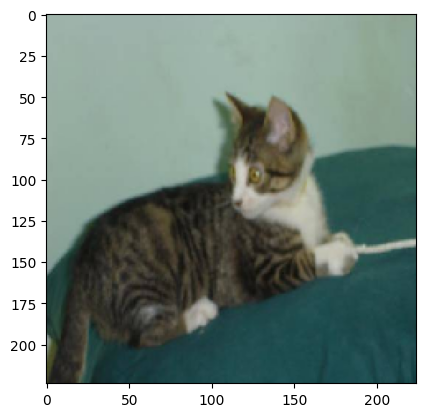

In [37]:
predict('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/10006.jpg')

1/1 [==============================] - 0s 196ms/step
Predicted: Ibizan_hound 99.20%
Ibizan_hound       0.992
American_Staffordshire_terrier  0.007
Italian_greyhound  0.001


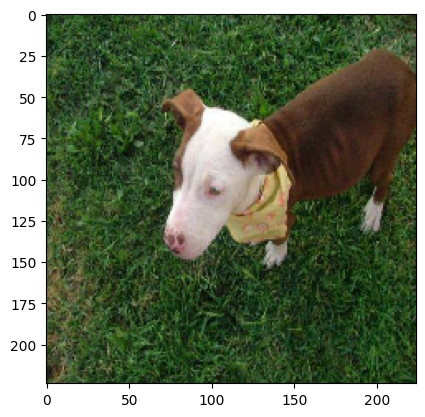

In [38]:
predict('/content/drive/MyDrive/deep_greenbook/datasets/dog_vs_cat/test_set/10010.jpg')

ส่วนตัวรู้สึกว่า accuracy ค่อนข้างชัดเจนกว่า VGG